# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
# print(weather_api_key)

# # Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# #output csv file
output_data_file= 'output_data/cities.csv'
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


In [3]:
lat_lngs[0:10]

[(79.8423519843804, -178.1662820224033),
 (45.91078692127576, 36.98801887287388),
 (62.53316729857494, 65.58908220197799),
 (16.21792732722507, 155.3051108885286),
 (-22.262934175380934, -76.05969528999685),
 (-63.55904063991299, 151.24229743230842),
 (52.879871569293556, -110.03775273314503),
 (58.43054519526805, -25.216508336482633),
 (-13.65916657553069, 169.71158060020298),
 (-26.351351413316074, 69.1945543585849)]

In [4]:
city = cities[0]
city

'bethel'

In [5]:
# Set the API base URL for weather map API call
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': -73.414, 'lat': 41.3712},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 60.4,
  'feels_like': 58.35,
  'temp_min': 55.54,
  'temp_max': 63.52,
  'pressure': 1021,
  'humidity': 47},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 230},
 'clouds': {'all': 0},
 'dt': 1700156335,
 'sys': {'type': 1,
  'id': 3888,
  'country': 'US',
  'sunrise': 1700134982,
  'sunset': 1700170439},
 'timezone': -18000,
 'id': 5282297,
 'name': 'Bethel',
 'cod': 200}

---

# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

#Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code(Perform API Calls)
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
city_lat = city_weather["coord"]["lat"]
# city_lat = city_weather.get("coord", {}).get("lat", None)

city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

In [7]:
{"City": city, 
  "Lat": city_lat, 
  "Lng": city_lng, 
  "Max Temp": city_max_temp,
  "Humidity": city_humidity,
  "Cloudiness": city_clouds,
  "Wind Speed": city_wind,
  "Country": city_country,
  "Date": city_date}

{'City': 'bethel',
 'Lat': 41.3712,
 'Lng': -73.414,
 'Max Temp': 63.52,
 'Humidity': 47,
 'Cloudiness': 0,
 'Wind Speed': 6.91,
 'Country': 'US',
 'Date': 1700156335}

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:500]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | starotitarovskaya
Processing Record 3 of Set 1 | priob'ye
Processing Record 4 of Set 1 | enewetak
Processing Record 5 of Set 1 | antofagasta
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | lloydminster
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | sola
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | chonchi
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | gevas
Processing Record 14 of Set 1 | savanna-la-mar
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | saipan
Processing Record 17 of Set 1 | chernomorskoye
Processing Record 18 of Set 1 | susuman
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | kerikeri
Processing Record 21 of Set 1 | zeya
Processing Record 22 of Set 1 | cedeira
Processing Record 23 of Set 

Processing Record 37 of Set 4 | kristiansund
Processing Record 38 of Set 4 | papatowai
Processing Record 39 of Set 4 | cold lake
Processing Record 40 of Set 4 | uruguaiana
Processing Record 41 of Set 4 | port saint john's
Processing Record 42 of Set 4 | kailua-kona
Processing Record 43 of Set 4 | cole harbour
Processing Record 44 of Set 4 | tadjourah
Processing Record 45 of Set 4 | puerto natales
Processing Record 46 of Set 4 | howard springs
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | hatvan
Processing Record 49 of Set 4 | el jadid
Processing Record 0 of Set 5 | weno
Processing Record 1 of Set 5 | udachny
Processing Record 2 of Set 5 | jaguaruna
Processing Record 3 of Set 5 | gao
Processing Record 4 of Set 5 | itaueira
Processing Record 5 of Set 5 | anadyr
Processing Record 6 of Set 5 | aasiaat
Processing Record 7 of Set 5 | benghazi
Processing Record 8 of Set 5 | syumsi
Processing Record 9 of Set 5 | tasbuget
'coord'
City tasbuget not found. Skipping

Processing Record 24 of Set 8 | geraldton
Processing Record 25 of Set 8 | mhamid
Processing Record 26 of Set 8 | puerto aysen
Processing Record 27 of Set 8 | beacon square
Processing Record 28 of Set 8 | fiditi
Processing Record 29 of Set 8 | hammerfest
Processing Record 30 of Set 8 | fortaleza
Processing Record 31 of Set 8 | pimentel
Processing Record 32 of Set 8 | shingu
Processing Record 33 of Set 8 | arraial do cabo
Processing Record 34 of Set 8 | nieul-sur-mer
Processing Record 35 of Set 8 | carnarvon
Processing Record 36 of Set 8 | armacao de buzios
Processing Record 37 of Set 8 | winejok
'coord'
City winejok not found. Skipping...
Processing Record 38 of Set 8 | ingersoll
Processing Record 39 of Set 8 | paulden
Processing Record 40 of Set 8 | shizunai-furukawacho
Processing Record 41 of Set 8 | karungdong
Processing Record 42 of Set 8 | fisterra
Processing Record 43 of Set 8 | maubara
'coord'
City maubara not found. Skipping...
Processing Record 44 of Set 8 | quimili
Processing 

In [9]:
# Convert the cities weather data (array of json) into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show Record Count
city_data_df.count()

City          480
Lat           480
Lng           480
Max Temp      480
Humidity      480
Cloudiness    480
Wind Speed    480
Country       480
Date          480
dtype: int64

In [10]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,63.52,47,0,6.91,US,1700156335
1,starotitarovskaya,45.2136,37.1439,45.07,81,59,6.89,RU,1700156535
2,priob'ye,62.5206,65.5964,21.02,93,100,2.55,RU,1700156535
3,enewetak,11.3474,162.3373,83.03,81,95,20.71,MH,1700156537
4,antofagasta,-23.6500,-70.4000,65.48,68,99,9.55,CL,1700156538


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,63.52,47,0,6.91,US,1700156335
1,starotitarovskaya,45.2136,37.1439,45.07,81,59,6.89,RU,1700156535
2,priob'ye,62.5206,65.5964,21.02,93,100,2.55,RU,1700156535
3,enewetak,11.3474,162.3373,83.03,81,95,20.71,MH,1700156537
4,antofagasta,-23.6500,-70.4000,65.48,68,99,9.55,CL,1700156538


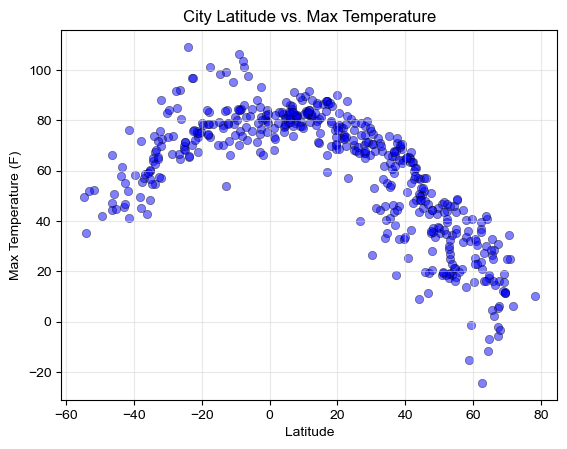

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], color="blue",edgecolor="black", linewidth=0.5, marker="o", alpha=0.5, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(color="lightgrey",alpha=0.5)
sns.set()

# Save the figure
plt.savefig("./output_data/Fig1.png")

#### Latitude Vs. Humidity

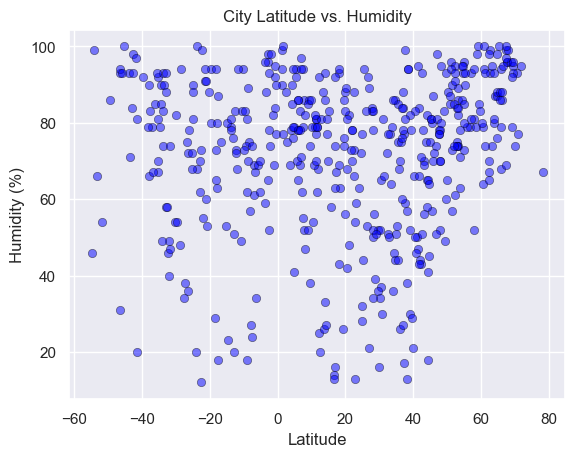

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],color="blue",edgecolor="black", linewidth=0.5, marker="o",alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()
# Save the figure
plt.savefig("output_data/Fig2.png")

#### Latitude Vs. Cloudiness

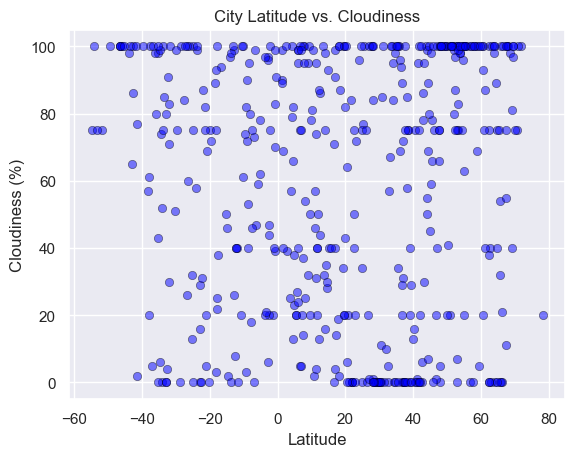

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],color="blue",edgecolor="black", linewidth=0.5, marker="o",alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness") 
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("output_data/Fig3.png")


#### Latitude vs. Wind Speed Plot

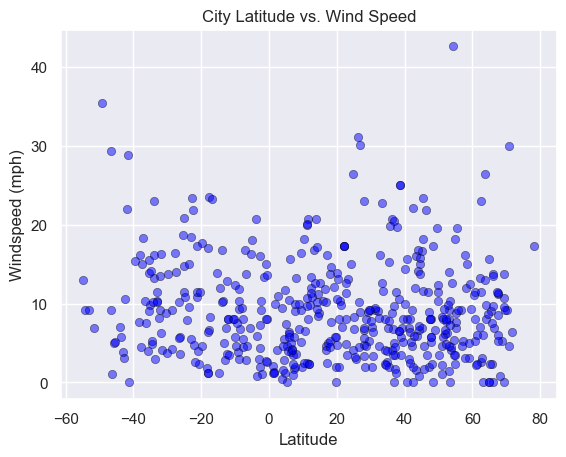

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],color="blue",edgecolor="black", linewidth=0.5, marker="o",alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
# northern_hemi_df.head()
northern_hemi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 479
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        335 non-null    object 
 1   Lat         335 non-null    float64
 2   Lng         335 non-null    float64
 3   Max Temp    335 non-null    float64
 4   Humidity    335 non-null    int64  
 5   Cloudiness  335 non-null    int64  
 6   Wind Speed  335 non-null    float64
 7   Country     335 non-null    object 
 8   Date        335 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 26.2+ KB


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
# southern_hemi_df.head()
southern_hemi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 4 to 477
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        145 non-null    object 
 1   Lat         145 non-null    float64
 2   Lng         145 non-null    float64
 3   Max Temp    145 non-null    float64
 4   Humidity    145 non-null    int64  
 5   Cloudiness  145 non-null    int64  
 6   Wind Speed  145 non-null    float64
 7   Country     141 non-null    object 
 8   Date        145 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 11.3+ KB


###  Temperature vs. Latitude Linear Regression Plot

In [19]:
#Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
  # Run regression 
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot 
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    print(f"The r-squared is: {rvalue}")
    plt.show()   

The r-squared is: -0.8820255458087203


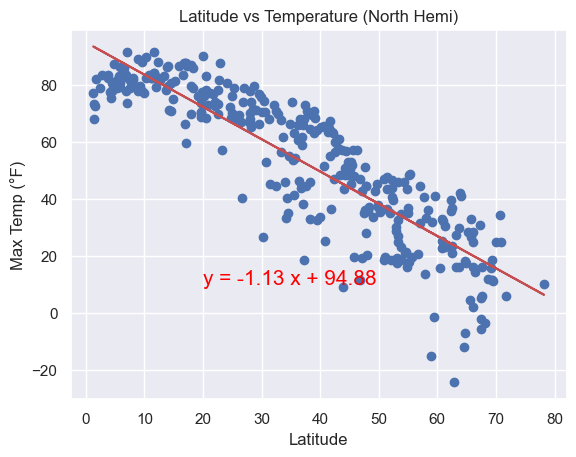

In [20]:
#Northern hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
#plot values  
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.title("Latitude vs Temperature (North Hemi)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°F)")
print(f"The r-squared is: {rvalue}") 

The r-squared is: 0.6900182803634016


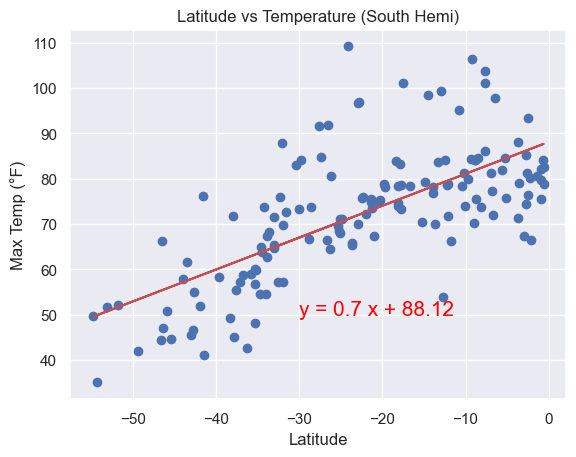

In [21]:
#Southern hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]

# Run regression 
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
#plot values  
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title("Latitude vs Temperature (South Hemi)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°F)")
print(f"The r-squared is: {rvalue}") 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.23419326656144476


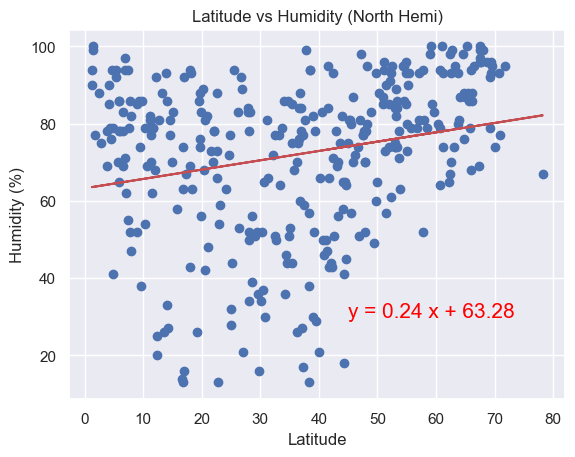

In [22]:
#Northern hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
# Run regression 
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
#plot values  
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.title("Latitude vs Humidity (North Hemi)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}") 

The r-squared is: -0.0625842114321187


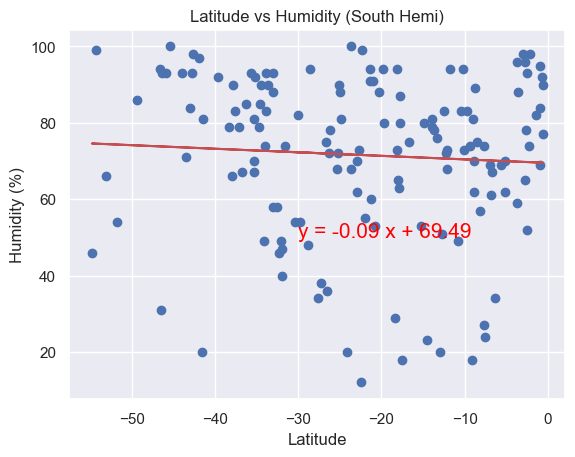

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
# Run regression 
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
#plot values  
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title("Latitude vs Humidity (South Hemi)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}") 

**Discussion about the linear relationship: A moderate positive correlation exists between the Northern Hemisphere humidity and the latitude at approximately 0.23 (higher latitudes, higher humidity). Conversely, the regression line between the Southern Hemisphere humidity and the latitude indicates a negative weak relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.16106731638188432


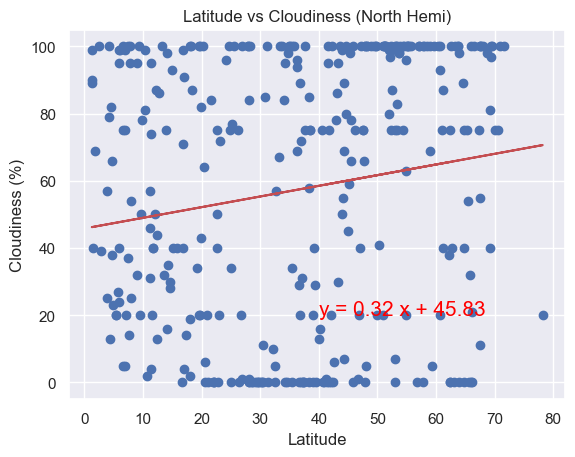

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
# Run regression 
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
#plot values  
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness (North Hemi)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

The r-squared is: -0.1903284590107029


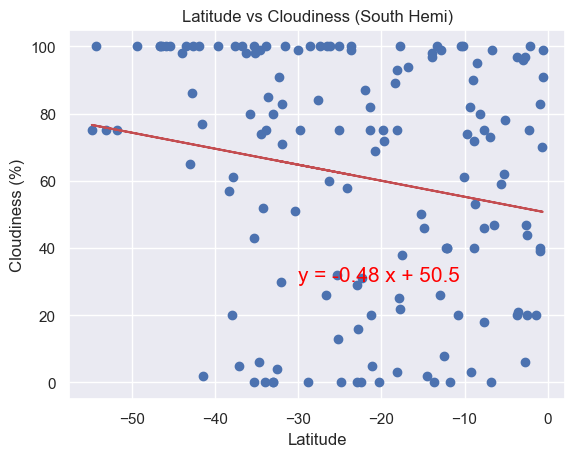

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
# Run regression 
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
#plot values  
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness (South Hemi)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

**Discussion about the linear relationship: There is a weak correlation between the Northern Hemisphere cloudiness and the latitude (at higher latitudes, higher cloudiness). Likewise, there is a weak negative correlation between the Southern Hemisphere cloudiness and the latitude at -0.19 (at higher latitude, lower cloudiness).  

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05240528959708254


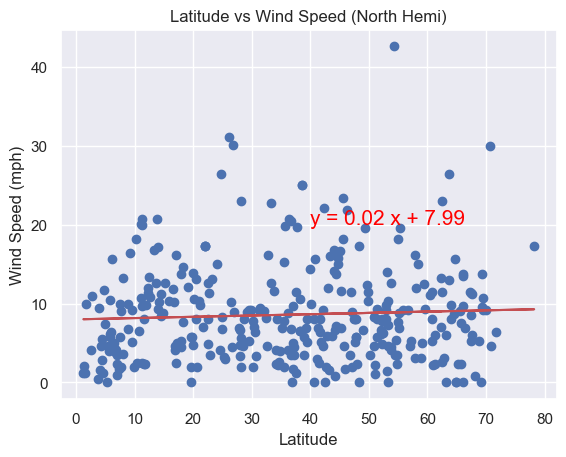

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
# Run regression 
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
#plot values  
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed (North Hemi)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

The r-squared is: -0.18031507875479855


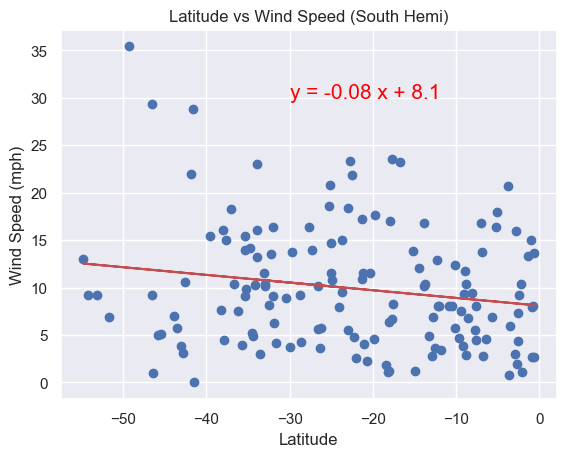

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
# Run regression 
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
#plot values  
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed (South Hemi)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

**Discussion about the linear relationship: The regression line indicates no correlation between the Northern Hemisphere wind speed and the latitude. Conversely, a weak negative correlation exists between the Southern Hemisphere wind speed and the latitude at -0.18 (at higher latitudes, wind speed).